# **Clustering**
___

**Question 1:**  What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

**Answer: Difference between K-Means and Hierarchical Clustering:**

1. **Algorithm Type:**
   - **K-Means:** A partitional clustering algorithm that divides the data into a predefined number of clusters (K) by minimizing the variance within each cluster.
   - **Hierarchical Clustering:** Builds a hierarchy of clusters either by agglomerative (bottom-up) or divisive (top-down) methods without requiring a predefined number of clusters.

2. **Number of Clusters:**
   - **K-Means:** Requires the number of clusters (K) to be specified before running the algorithm.
   - **Hierarchical Clustering:** Does not require specifying the number of clusters upfront; the dendrogram can be cut at any level to obtain the desired number of clusters.

3. **Cluster Shape:**
   - **K-Means:** Assumes clusters are spherical and works best with convex clusters.
   - **Hierarchical Clustering:** Can capture clusters of arbitrary shapes depending on the linkage criteria used.

4. **Scalability:**
   - **K-Means:** More scalable and efficient for large datasets.
   - **Hierarchical Clustering:** Computationally expensive and less scalable for large datasets.

5. **Output:**
   - **K-Means:** Produces a flat partition of the data.
   - **Hierarchical Clustering:** Produces a dendrogram representing nested clusters.


**Use Cases:**

- **K-Means Use Case:** Customer segmentation in marketing where the number of customer groups is known or can be estimated. For example, grouping customers based on purchasing behavior to target marketing campaigns.

- **Hierarchical Clustering Use Case:** Gene expression data analysis in bioinformatics where the relationships between genes are explored, and the number of clusters is not known beforehand. The dendrogram helps visualize the nested structure of gene clusters.

___

**Question 2:** Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

**Answer: Purpose of the Silhouette Score in Evaluating Clustering Algorithms:**

The Silhouette Score is a metric used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters. The score combines two key concepts:

- **Cohesion:** How close a data point is to other points in the same cluster.
- **Separation:** How far a data point is from points in the nearest neighboring cluster.

For each data point, the Silhouette Score is calculated as:

\$$
s = \frac{b - a}{\max(a, b)}
\$$

where:

- \$a\$ = average distance between the point and all other points in the same cluster (intra-cluster distance).
- \$b\$ = average distance between the point and all points in the nearest different cluster (nearest-cluster distance).

The score ranges from -1 to 1:

- A score close to +1 indicates the data point is well matched to its own cluster and poorly matched to neighboring clusters.
- A score around 0 indicates the data point lies on or very close to the decision boundary between two clusters.
- A score close to -1 indicates the data point may have been assigned to the wrong cluster.

**Overall, the Silhouette Score helps:**

- Assess the compactness and separation of clusters.
- Compare different clustering algorithms or different numbers of clusters.
- Select the optimal number of clusters by maximizing the average Silhouette Score.

___

**Question 3:** What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer: Core Parameters of DBSCAN and Their Influence on Clustering:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two main parameters:

1. **Epsilon (\$\varepsilon\$) — Neighborhood Radius:**
   - Defines the radius around a data point to consider its neighbors.
   - A point is considered a neighbor if it lies within this radius.
   - **Influence:**
     - A small \$\varepsilon\$ leads to many small clusters or many points labeled as noise (outliers).
     - A large \$\varepsilon\$ may merge distinct clusters into one large cluster, reducing the ability to detect meaningful clusters.

2. **MinPts — Minimum Points:**
   - The minimum number of points required within the \$\varepsilon\$-neighborhood for a point to be considered a **core point**.
   - **Influence:**
     - A higher MinPts value requires denser regions to form clusters, which can result in fewer clusters and more noise points.
     - A lower MinPts value allows sparser clusters but may increase the chance of noise points being included in clusters.

**How These Parameters Influence the Clustering Process:**

- DBSCAN identifies **core points** (points with at least MinPts neighbors within \$\varepsilon\$) and expands clusters from these points.
- Points within \$\varepsilon\$ of a core point are **directly density-reachable** and included in the cluster.
- Points reachable through a chain of core points are also included.
- Points not reachable from any core point are labeled as **noise**.

Choosing appropriate values for \$\varepsilon\$ and MinPts is crucial for meaningful clustering results. Often, a k-distance graph is used to help select \$\varepsilon\$.

___

**Question 4:** Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:** Feature scaling is important when applying clustering algorithms like K-Means and DBSCAN because these algorithms rely on distance measures (such as Euclidean distance) to group data points. If features have different scales or units, those with larger ranges will dominate the distance calculations, leading to biased clustering results.

**Key reasons why feature scaling is important:**

1. **Equal Contribution of Features:**  
   Scaling ensures that all features contribute equally to the distance computation, preventing features with larger numeric ranges from disproportionately influencing the clustering.

2. **Improved Algorithm Performance:**  
   Algorithms like K-Means and DBSCAN use distance thresholds or centroids based on distances. Without scaling, clusters may be skewed or incorrectly formed.

3. **Faster Convergence (for K-Means):**  
   Properly scaled features help K-Means converge faster because the centroid updates are more balanced.

**Common Scaling Techniques:**

- **Standardization (Z-score normalization):** Transforms features to have zero mean and unit variance.
- **Min-Max Scaling:** Scales features to a fixed range, usually [0, 1].

___

**Question 5:** What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Answer:**
The **Elbow Method** is a technique used in K-Means clustering to determine the optimal number of clusters (\(K\)) by analyzing the within-cluster sum of squares (WCSS), also known as the inertia.

**How the Elbow Method Works:**

1. **Run K-Means for different values of \(K\):**  
   For each value of \(K\) (e.g., from 1 to 10), run the K-Means algorithm and calculate the WCSS, which measures the total squared distance between each point and its assigned cluster centroid.

2. **Plot WCSS against \(K\):**  
   Create a plot with the number of clusters \(K\) on the x-axis and the corresponding WCSS on the y-axis.

3. **Identify the "Elbow" point:**  
   The plot typically shows a decreasing trend in WCSS as \(K\) increases because adding more clusters reduces the distance within clusters. The "elbow" point is where the rate of decrease sharply changes — the curve bends like an elbow.

**Why the Elbow Point Indicates the Optimal \(K\):**

- Before the elbow, adding clusters significantly reduces WCSS, meaning clusters are becoming more compact.
- After the elbow, adding more clusters yields diminishing returns, with only small improvements in WCSS.
- Thus, the elbow point balances cluster compactness and model simplicity, suggesting the optimal number of clusters.


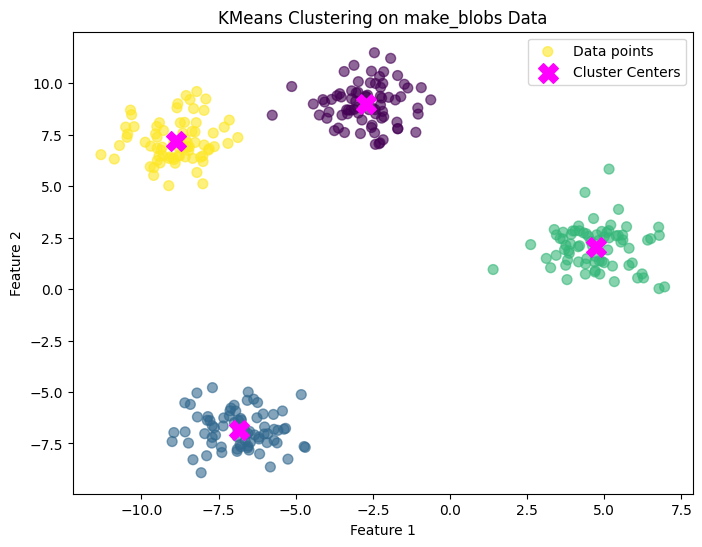

In [ ]:
#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generate synthetic data with 300 samples and 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters and cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6, label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='Magenta', marker='X', label='Cluster Centers')
plt.title('KMeans Clustering on make_blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler to scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps and min_samples can be tuned
dbscan.fit(X_scaled)

# Extract labels (-1 is noise)
labels = dbscan.labels_

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters}")

Number of clusters found (excluding noise): 0


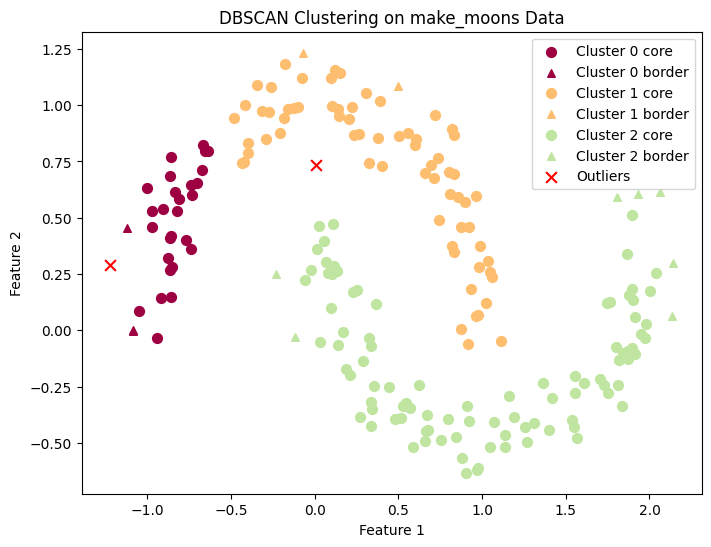

In [ ]:
#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Identify core points, clusters, and outliers
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = labels == -1

# Plot the clusters
plt.figure(figsize=(8,6))
# Plot core and border points colored by cluster label (excluding noise)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise (outliers) will be plotted separately
        continue
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', label=f'Cluster {k} core')
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='^', label=f'Cluster {k} border')

# Plot outliers
xy = X[outliers_mask]
plt.scatter(xy[:, 0], xy[:, 1], s=60, c='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

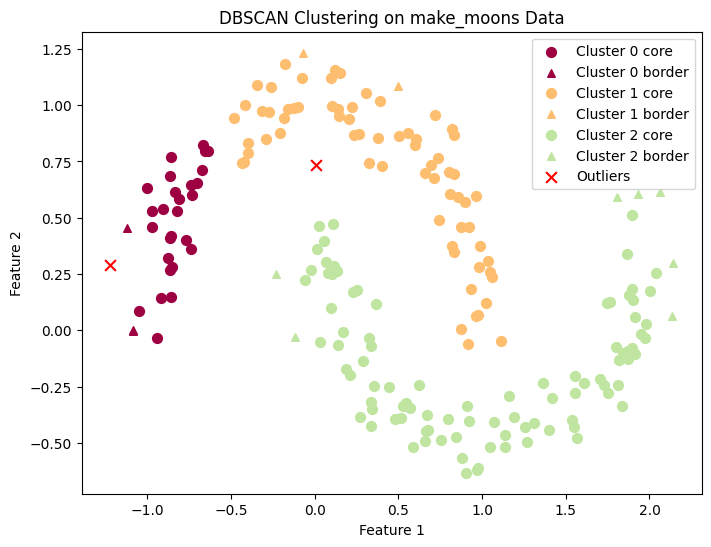

In [ ]:
#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Identify core points, clusters, and outliers
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
outliers_mask = labels == -1

# Plot the clusters
plt.figure(figsize=(8,6))
# Plot core and border points colored by cluster label (excluding noise)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise (outliers) will be plotted separately
        continue
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', label=f'Cluster {k} core')
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='^', label=f'Cluster {k} border')

# Plot outliers
xy = X[outliers_mask]
plt.scatter(xy[:, 0], xy[:, 1], s=60, c='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Question 10:** You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:
* Which clustering algorithm(s) would you use and why?
* How would you preprocess the data (missing values, scaling)?
* How would you determine the number of clusters?
* How would the marketing team benefit from your clustering analysis?

**Answer:**

### Data Science Workflow for Customer Segmentation Using Clustering

#### 1. Choice of Clustering Algorithm(s):

- **K-Means:**  
  Suitable if the data is numeric and clusters are expected to be spherical and roughly equal in size. It is efficient and interpretable.

- **DBSCAN:**  
  Useful if clusters have irregular shapes or if we want to identify noise/outliers (e.g., unusual customers). It does not require specifying the number of clusters upfront.

- **Hierarchical Clustering:**  
  Helpful for understanding cluster relationships and when the number of clusters is unknown.

**In practice, I would start with K-Means for its simplicity and speed, then validate results with DBSCAN or hierarchical clustering if needed.**


#### 2. Data Preprocessing:

- **Handling Missing Values:**  
  - Impute missing values using mean/median for numeric features or mode for categorical features.  
  - Alternatively, use more advanced imputation methods like KNN imputation.

- **Encoding Categorical Variables:**  
  - Use one-hot encoding or ordinal encoding depending on the nature of categorical features.

- **Feature Scaling:**  
  - Apply StandardScaler or MinMaxScaler to ensure all features contribute equally to distance calculations.

- **Dimensionality Reduction (optional):**  
  - Use PCA or t-SNE for visualization or to reduce noise.


#### 3. Determining the Number of Clusters:

- Use the **Elbow Method** to plot within-cluster sum of squares (WCSS) vs. number of clusters and identify the "elbow" point.

- Use **Silhouette Score** to evaluate cluster cohesion and separation.

- For DBSCAN, tune parameters (\(\varepsilon\), MinPts) using k-distance plots.


#### 4. Benefits to the Marketing Team:

- **Targeted Promotions:**  
  Identify distinct customer segments with similar purchasing behavior to tailor marketing campaigns.

- **Personalized Recommendations:**  
  Suggest products based on cluster preferences.

- **Resource Optimization:**  
  Allocate marketing budget efficiently by focusing on high-value or high-potential segments.

- **Customer Retention:**  
  Detect at-risk customers or niche groups for special offers.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df is the customer dataset with demographics and purchase history
# For demonstration, let's create a dummy DataFrame
data = {
    'Age': [25, 45, 35, None, 50],
    'Gender': ['M', 'F', 'F', 'M', None],
    'Annual_Income': [50000, 80000, 60000, 70000, 65000],
    'Category_A_Purchases': [5, 2, 3, 4, 1],
    'Category_B_Purchases': [0, 1, 0, 2, 1]
}
df = pd.DataFrame(data)

# Separate features by type
numeric_features = ['Age', 'Annual_Income', 'Category_A_Purchases', 'Category_B_Purchases']
categorical_features = ['Gender']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess data
X_processed = preprocessor.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_processed)
labels = kmeans.labels_

# Evaluate clustering with silhouette score
score = silhouette_score(X_processed, labels)
print(f'Silhouette Score for 3 clusters: {score:.3f}')

# Add cluster labels to original data
df['Cluster'] = labels
print(df)

Silhouette Score for 3 clusters: 0.060
    Age Gender  Annual_Income  Category_A_Purchases  Category_B_Purchases  \
0  25.0      M          50000                     5                     0   
1  45.0      F          80000                     2                     1   
2  35.0      F          60000                     3                     0   
3   NaN      M          70000                     4                     2   
4  50.0   None          65000                     1                     1   

   Cluster  
0        2  
1        0  
2        1  
3        0  
4        0  
